In [54]:
import requests
import pandas as pd
import requests
import pandas as pd
from collections import defaultdict
import re
import requests
import numpy as np
import pandas as pd
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import graphviz

In [55]:
from networkx.drawing.nx_agraph import graphviz_layout

In [56]:
url = "https://www.datos.gov.co/resource/v98q-23dp.json?$query=SELECT%0A%20%20%60titulo%60%2C%0A%20%20%60descripcion%60%2C%0A%20%20%60url_lista_de_reproduccion%60%2C%0A%20%20%60plataforma%60"

# Realizar la solicitud GET al servicio
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Obtener los datos en formato JSON
    data = response.json()

    # Crear un DataFrame con los datos
    df = pd.DataFrame(data)

    # Obtener todos los títulos en una lista
    titulos = df['titulo'].tolist()
    # Diccionario para almacenar las palabras y sus repeticiones
    palabras_dict = defaultdict(int)
    # Recorrer los títulos y contar las palabras
    for titulo in titulos:
        # Convertir el texto a minúsculas y remover tildes
        titulo = titulo.lower()
        titulo = re.sub('[áäâà]', 'a', titulo)
        titulo = re.sub('[éëêè]', 'e', titulo)
        titulo = re.sub('[íïîì]', 'i', titulo)
        titulo = re.sub('[óöôò]', 'o', titulo)
        titulo = re.sub('[úüûù]', 'u', titulo)
        titulo = re.sub('[^a-z]', ' ', titulo)  
        titulo = re.sub('\s+', ' ', titulo)
        
        # Dividir el texto en palabras
        palabras = titulo.split()

        
        # Contar las repeticiones de cada palabra
        for palabra in palabras:
            if palabra != "-":
                palabras_dict[palabra] += 1
    # Calcular el número total de palabras únicas
    num_palabras_unicas = len(palabras_dict)

    # Calcular el número total de palabras en el dataset
    num_palabras_totales = sum(palabras_dict.values())

    # Imprimir los resultados
    print("Número total de palabras únicas:", num_palabras_unicas)
    print("Número total de palabras en el dataset:", num_palabras_totales)
else:
    print("Error en la solicitud:", response.status_code)

Número total de palabras únicas: 1874
Número total de palabras en el dataset: 7154


In [57]:
df

,titulo,descripcion,url_lista_de_reproduccion,plataforma
0,Urbílogo - Bogotá dominguera,Entretenimiento,https://www.youtube.com/watch?v=2SNMqfo8COo,Señal Colombia
1,Historias en bici - Sibaté pedalea su pasado,Deportes,https://www.youtube.com/watch?v=ooEcRqrIyF8,Señal Deportes
2,Today in replay 18 de febrero,Deportes,https://www.youtube.com/watch?v=jzNsXnuQpDU,Señal Deportes
3,"Documentales: 'Camilo, el cura guerrillero' - ...",Película y Animación,https://www.youtube.com/watch?v=2vFrMJlP9OY,Señal Colombia
4,En cine nos vemos - Cuchillo de palo - Renate ...,Película y Animación,https://www.youtube.com/watch?v=VCtHtjphNOY,Señal Colombia
...,...,...,...,...
995,Para ver TV - Deporte,Entretenimiento,https://www.youtube.com/watch?v=yRW4EdsB8F0,Señal Colombia
996,Franja Retro - NN,Deportes,https://www.youtube.com/watch?v=I_0avV2Ql2o,Señal Colombia
997,Todo lo que vemos - 118 - Televidentes - Frank...,Educación,https://www.youtube.com/watch?v=k8aG5jcPp7w,Señal Colombia
998,sillón justicia música e identidad,Entretenimiento,https://www.youtube.com/watch?v=J0RMXGpu_BU,Señal Colombia


In [58]:
pandas_by_institution_a = df[['descripcion']].groupby('descripcion').count()
df['descripcion'].count()
print(pandas_by_institution_a)

Empty DataFrame
Columns: []
Index: [Ciencia y Tecnología, Comedia, Deportes, Educación, Entretenimiento, Gente y Blogs, Mascotas y Animales, Música, Noticias y Política, Película y Animación, Sin fines de lucro y Activismo, Viajes y Eventos]


In [59]:
df[['descripcion']].groupby('descripcion').count()

""
descripcion
Ciencia y Tecnología
Comedia
Deportes
Educación
Entretenimiento
Gente y Blogs
Mascotas y Animales
Música
Noticias y Política


In [60]:
conteo = df['descripcion'].value_counts()
print(conteo)

Entretenimiento                   279
Deportes                          236
Película y Animación              217
Educación                         141
Gente y Blogs                      67
Música                             41
Viajes y Eventos                   12
Ciencia y Tecnología                3
Mascotas y Animales                 1
Sin fines de lucro y Activismo      1
Comedia                             1
Noticias y Política                 1
Name: descripcion, dtype: int64


In [61]:
conteo_df = df['descripcion'].value_counts().to_frame()

print(conteo_df)

                                descripcion
Entretenimiento                         279
Deportes                                236
Película y Animación                    217
Educación                               141
Gente y Blogs                            67
Música                                   41
Viajes y Eventos                         12
Ciencia y Tecnología                      3
Mascotas y Animales                       1
Sin fines de lucro y Activismo            1
Comedia                                   1
Noticias y Política                       1


In [62]:
escuelas_nuevas = list(conteo_df.query("descripcion>30").index)

In [63]:
df["categoria"] = df.descripcion.apply(lambda x: x if x in escuelas_nuevas else 'otros')

In [64]:
df

,titulo,descripcion,url_lista_de_reproduccion,plataforma,categoria
0,Urbílogo - Bogotá dominguera,Entretenimiento,https://www.youtube.com/watch?v=2SNMqfo8COo,Señal Colombia,Entretenimiento
1,Historias en bici - Sibaté pedalea su pasado,Deportes,https://www.youtube.com/watch?v=ooEcRqrIyF8,Señal Deportes,Deportes
2,Today in replay 18 de febrero,Deportes,https://www.youtube.com/watch?v=jzNsXnuQpDU,Señal Deportes,Deportes
3,"Documentales: 'Camilo, el cura guerrillero' - ...",Película y Animación,https://www.youtube.com/watch?v=2vFrMJlP9OY,Señal Colombia,Película y Animación
4,En cine nos vemos - Cuchillo de palo - Renate ...,Película y Animación,https://www.youtube.com/watch?v=VCtHtjphNOY,Señal Colombia,Película y Animación
...,...,...,...,...,...
995,Para ver TV - Deporte,Entretenimiento,https://www.youtube.com/watch?v=yRW4EdsB8F0,Señal Colombia,Entretenimiento
996,Franja Retro - NN,Deportes,https://www.youtube.com/watch?v=I_0avV2Ql2o,Señal Colombia,Deportes
997,Todo lo que vemos - 118 - Televidentes - Frank...,Educación,https://www.youtube.com/watch?v=k8aG5jcPp7w,Señal Colombia,Educación
998,sillón justicia música e identidad,Entretenimiento,https://www.youtube.com/watch?v=J0RMXGpu_BU,Señal Colombia,Entretenimiento


In [65]:
conteo1 = df['categoria'].value_counts()
print(conteo1)

Entretenimiento         279
Deportes                236
Película y Animación    217
Educación               141
Gente y Blogs            67
Música                   41
otros                    19
Name: categoria, dtype: int64


## i. Utilizar todos los datos, y explorar el numero total de palabras únicas en todos los títulos de train y el numero total de repeticiones (Crear un diccionario para saber si la palabra ya fue observada antes e intentar remover tildes y poner el texto en minúsculas), ¿Cuántas palabras hay en el data set?, generar la siguiente matriz.

In [66]:
lista = list(palabras_dict.keys())
dic = { v:k for k,v in enumerate(lista)}
matriz1=[]
for a in titulos:
    palabras1 = [0] *  (len(palabras_dict))
    a = a.lower()
    a = re.sub('[áäâà]', 'a', a)
    a = re.sub('[éëêè]', 'e', a)
    a = re.sub('[íïîì]', 'i', a)
    a = re.sub('[óöôò]', 'o', a)
    a = re.sub('[úüûù]', 'u', a)
    a = re.sub('[^a-z]', ' ', a)  # Eliminar caracteres no alfabéticos
    a = re.sub('\s+', ' ', a)
    palabras2 = a.split()
    for i in palabras2:
        palabras1[dic[i]] = palabras1[dic[i]]  + 1
    matriz1.append(palabras1)


#### parte de la matriz

In [67]:
print(matriz1[0])
print(matriz1[1])
print(matriz1[2])
print(matriz1[3])
print(matriz1[4])


[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#### palabras totales

In [68]:
print("Número total de palabras únicas:", num_palabras_unicas)
print("Número total de palabras en el dataset:", num_palabras_totales)

Número total de palabras únicas: 1874
Número total de palabras en el dataset: 7154


## ii. Crear un gráfico de barras con las 10 palabras más comunes, ¿son útiles?, normalmente las palabras más comunes son llamadas stop words. Y corresponden a los artículos o preposiciones. Generar nuevamente los gráficos. Y una matriz de correlación utilizando dummy

In [69]:
top_10_words = sorted(palabras_dict.items(), key=lambda x: x[1], reverse=True)[:10]
dic_top10=defaultdict(int)
for word in top_10_words:
    dic_top10[word[0]] = word[1]
top_words = [word[0] for word in top_10_words]
word_counts = [word[1] for word in top_10_words]
print(dic_top10)


defaultdict(<class 'int'>, {'de': 379, 'que': 268, 'vemos': 261, 'lo': 259, 'todo': 248, 'la': 146, 'en': 137, 'a': 125, 'el': 105, 'al': 103})


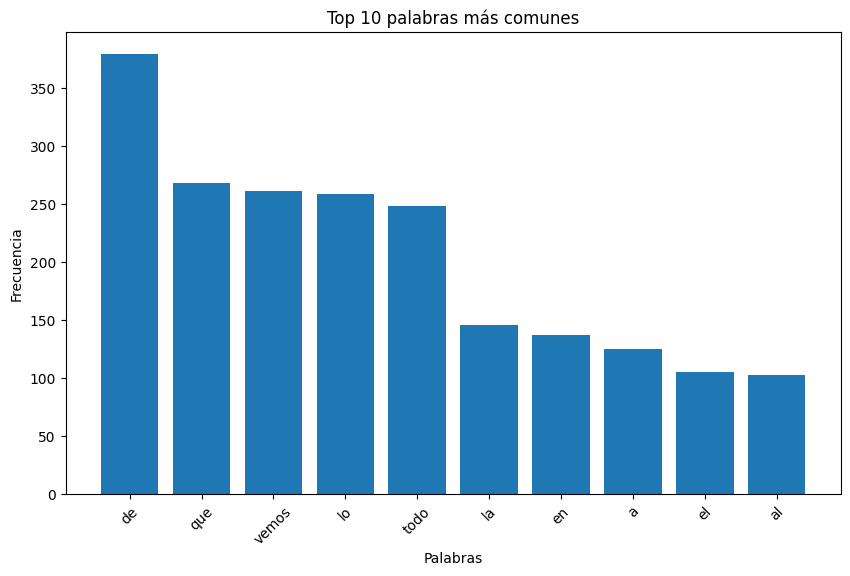

In [70]:
plt.figure(figsize=(10, 6))
plt.bar(top_words, word_counts)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 10 palabras más comunes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

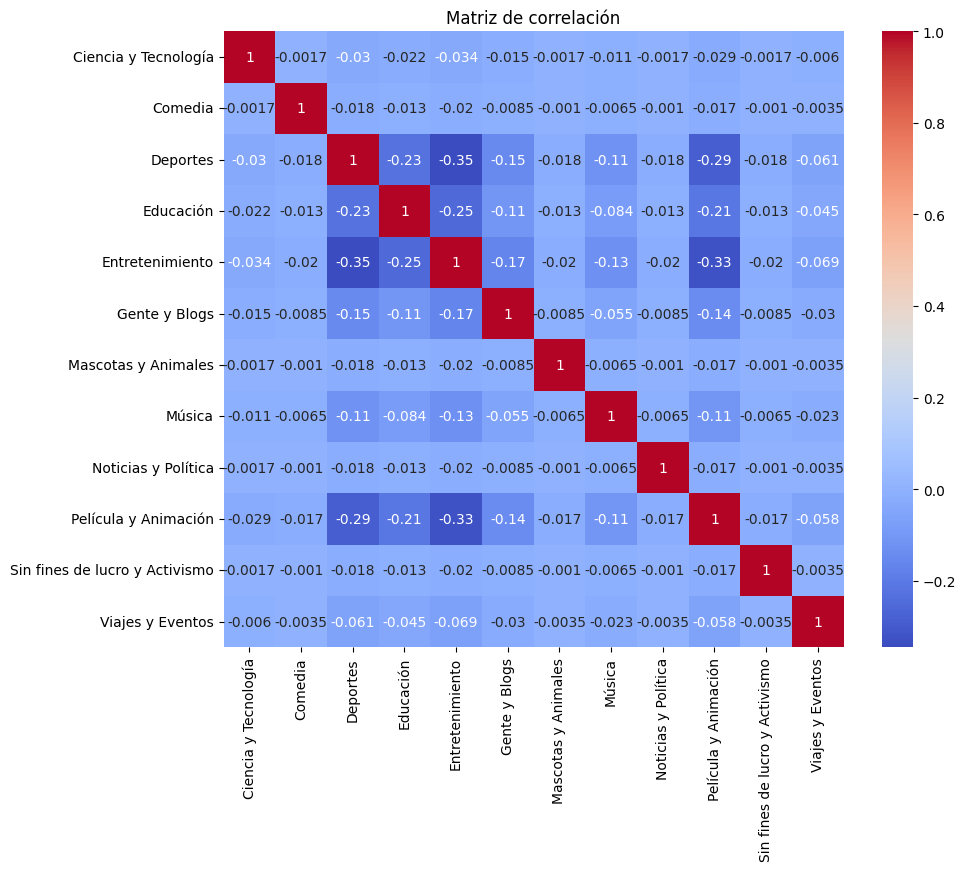

In [71]:
dummy_categories = pd.get_dummies(df['descripcion'])
correlation_matrix = dummy_categories.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

## ¿Son utiles?
Realmente no lo son, son palabras bastante comunes, que pueden estar en todas las categorias, es mejor removerlas

In [72]:
palabras_dic_sin_tp10=defaultdict(int)
for titulo in titulos:
        # Convertir el texto a minúsculas y remover tildes
    titulo = titulo.lower()
    titulo = re.sub('[áäâà]', 'a', titulo)
    titulo = re.sub('[éëêè]', 'e', titulo)
    titulo = re.sub('[íïîì]', 'i', titulo)
    titulo = re.sub('[óöôò]', 'o', titulo)
    titulo = re.sub('[úüûù]', 'u', titulo)
    titulo = re.sub('[^a-z]', ' ', titulo)  
    titulo = re.sub('\s+', ' ', titulo)
        
        # Dividir el texto en palabras
    palabras = titulo.split()

        
        # Contar las repeticiones de cada palabra
    for palabra in palabras:
        if palabra != "-" and palabra not in dic_top10:
            palabras_dic_sin_tp10[palabra] += 1


## También generar la matrix nueva eliminando los stopwords y dividimos por el numero total de palabras en cada título. Esta matriz se llama TF (Term Frequency)1

In [73]:

lista = list(palabras_dic_sin_tp10.keys())
dic = { v:k for k,v in enumerate(lista)}
dic['bogota']
matriz=[]
for a in titulos:
    palabras1 = [0] *  (len(palabras_dic_sin_tp10))
    a = a.lower()
    a = re.sub('[áäâà]', 'a', a)
    a = re.sub('[éëêè]', 'e', a)
    a = re.sub('[íïîì]', 'i', a)
    a = re.sub('[óöôò]', 'o', a)
    a = re.sub('[úüûù]', 'u', a)
    a = re.sub('[^a-z]', ' ', a)  # Eliminar caracteres no alfabéticos
    a = re.sub('\s+', ' ', a)
    palabras2 = a.split()
    for i in palabras2:
        if i not in dic_top10:
            palabras1[dic[i]] = palabras1[dic[i]]  + 1
    o=0
    for  o in range(len(palabras1)):
        if palabras1[o] != 0:
            palabras1[o]= palabras1[o]/sum(palabras1)
    matriz.append(palabras1)



In [74]:
print(matriz[0])
print(len(matriz[0]))
print(matriz[1])
print(len(matriz[1]))
print(matriz[2])
print(len(matriz[2]))
print(len(titulos))
print(len(matriz))

[0.3333333333333333, 0.4285714285714286, 0.5675675675675675, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Ahora vamos a crear un vector contando el numero de titulos que tiene cada palabra. Este vector tiene “n” elementos y el valor es el número de títulos que tiene la palabra. Por último vamos a transformar el numero calculando el log(Total de documentos/ (Numero de documentos con la Palabra i + 1) ). El +1 es para q no quede el numero indeterminado cuando algún valor es “0”, el vector es llamado IDF(Inverse Document Frequency)

In [75]:
from math import log
IDf = [0] * (len(palabras_dic_sin_tp10))
dicAux = defaultdict(int)
for titulo1 in titulos:
    aux = defaultdict(int)
    titulo1 = titulo1.lower()
    titulo1 = re.sub('[áäâà]', 'a', titulo1)
    titulo1 = re.sub('[éëêè]', 'e', titulo1)
    titulo1 = re.sub('[íïîì]', 'i', titulo1)
    titulo1 = re.sub('[óöôò]', 'o', titulo1)
    titulo1 = re.sub('[úüûù]', 'u', titulo1)
    titulo1 = re.sub('[^a-z]', ' ', titulo1)  # Eliminar caracteres no alfabéticos
    titulo1 = re.sub('\s+', ' ', titulo1)
    palabras4 = titulo1.split()
    aux2 = 0
    palabrasUnicas =[]
    for g in palabras4:
        if g != "-" and  g not in dic_top10:
            if g not in aux and g not in dic_top10:
                palabrasUnicas.append(g)
            aux[g] = aux2
            dicAux[g] = aux2
            aux2 = aux2 +1
    for palabraAgre in  palabrasUnicas:
        if palabraAgre  in dic:
            IDf[dic[palabraAgre]] = IDf[dic[palabraAgre]] +1
print(IDf)
print(len(IDf))
for otra in range(len(IDf)):
    IDf[otra] = log((1000)/(IDf[otra]+1))

print(IDf)
print(len(IDf))


[3, 5, 1, 8, 6, 1, 1, 10, 1, 39, 39, 39, 14, 1, 2, 1, 1, 9, 6, 11, 40, 41, 94, 7, 52, 41, 1, 1, 1, 1, 93, 20, 25, 1, 2, 26, 5, 2, 8, 73, 8, 1, 1, 6, 3, 6, 6, 1, 14, 16, 1, 1, 2, 3, 2, 2, 2, 1, 45, 12, 31, 23, 1, 22, 2, 3, 21, 41, 22, 2, 6, 1, 10, 38, 4, 5, 1, 2, 13, 2, 1, 4, 2, 77, 6, 5, 3, 22, 23, 61, 1, 2, 2, 1, 3, 16, 1, 11, 65, 12, 5, 1, 10, 5, 2, 1, 1, 4, 1, 1, 1, 2, 9, 17, 8, 1, 1, 5, 4, 2, 1, 1, 6, 1, 1, 48, 2, 2, 1, 1, 11, 1, 11, 11, 12, 2, 1, 80, 3, 4, 2, 1, 18, 2, 2, 15, 1, 1, 1, 26, 15, 7, 4, 2, 14, 11, 6, 3, 2, 2, 2, 2, 2, 2, 9, 1, 5, 2, 1, 12, 5, 1, 1, 1, 7, 7, 2, 2, 13, 9, 6, 8, 1, 1, 3, 2, 2, 1, 6, 3, 1, 24, 1, 2, 8, 3, 4, 7, 7, 10, 14, 1, 1, 34, 4, 1, 1, 1, 2, 2, 18, 14, 1, 1, 4, 6, 1, 2, 22, 2, 6, 1, 2, 1, 1, 6, 3, 3, 1, 1, 1, 1, 5, 3, 2, 2, 2, 1, 2, 3, 5, 3, 1, 1, 7, 4, 2, 2, 1, 1, 2, 8, 1, 1, 5, 3, 3, 1, 1, 6, 6, 11, 2, 1, 2, 3, 1, 1, 1, 1, 1, 20, 1, 3, 26, 1, 7, 6, 1, 1, 1, 2, 6, 3, 1, 2, 1, 15, 2, 9, 11, 2, 2, 18, 14, 17, 1, 2, 4, 15, 16, 1, 1, 4, 2, 5, 1, 1, 5, 4,

## Ahora vamos a multiplicar el vector TF (La matriz) * IDF (Vector transpuesto), El resultado es una matriz de m títulos por n palabras. Y dividir el dataset en test y train.

In [76]:
tf_idf = []
for vector in matriz:
    aux3 = [0]* (len(vector))
    for op in range(len(vector)):
        aux3[op]= vector[op]*IDf[op]
    tf_idf.append(aux3)

print(tf_idf[0])
print(len(tf_idf[0]))
print(tf_idf[1])
print(len(tf_idf[1]))
print(tf_idf[2])
print(len(tf_idf[2]))
print(len(tf_idf))
print(titulos[1])

[1.8404869726207487, 2.19256963275175, 3.5272100018071897, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [77]:
palabrasUnicasVector =[]
aux4 = defaultdict(int)
aux5 = 0
for titulo2 in titulos:
    titulo2 = titulo2.lower()
    titulo2 = re.sub('[áäâà]', 'a', titulo2)
    titulo2 = re.sub('[éëêè]', 'e', titulo2)
    titulo2 = re.sub('[íïîì]', 'i', titulo2)
    titulo2 = re.sub('[óöôò]', 'o', titulo2)
    titulo2 = re.sub('[úüûù]', 'u', titulo2)
    titulo2 = re.sub('[^a-z]', ' ', titulo2)  # Eliminar caracteres no alfabéticos
    titulo2 = re.sub('\s+', ' ', titulo2)
    palabras5 = titulo2.split()
    for k in palabras5:
        if k != "-":
            if k not in aux4 and k not in dic_top10:
                palabrasUnicasVector.append(k)
            aux4[k] = aux5
            aux5 = aux5 +1
print(dic)
print(len(dic))
print(palabrasUnicasVector)
print(len(palabrasUnicasVector))
df_2 = pd.DataFrame(data=tf_idf, columns=palabrasUnicasVector)

{'urbilogo': 0, 'bogota': 1, 'dominguera': 2, 'historias': 3, 'bici': 4, 'sibate': 5, 'pedalea': 6, 'su': 7, 'pasado': 8, 'today': 9, 'in': 10, 'replay': 11, 'febrero': 12, 'documentales': 13, 'camilo': 14, 'cura': 15, 'guerrillero': 16, 'hoy': 17, 'martes': 18, 'mayo': 19, 'p': 20, 'm': 21, 'se': 22, 'alparapensar': 23, 'cine': 24, 'nos': 25, 'cuchillo': 26, 'palo': 27, 'renate': 28, 'costa': 29, 'los': 30, 'pepa': 31, 'clip': 32, 'mascara': 33, 'carnaval': 34, 'saludo': 35, 'miguel': 36, 'angel': 37, 'lopez': 38, 'televidente': 39, 'oscar': 40, 'augusto': 41, 'ferreira': 42, 'nairo': 43, 'quintana': 44, 'ya': 45, 'esta': 46, 'viajando': 47, 'francia': 48, 'sillon': 49, 'hip': 50, 'hop': 51, 'concurso': 52, 'nacional': 53, 'bandas': 54, 'paipa': 55, 'boyaca': 56, 'desfile': 57, 'completo': 58, 'tour': 59, 'con': 60, 'sub': 61, 'originalidad': 62, 'pedaleopor': 63, 'ariel': 64, 'molina': 65, 'envia': 66, 'un': 67, 'escarabajos': 68, 'frank': 69, 'ramirez': 70, 'icono': 71, 'tv': 72, 'c

In [78]:
df_2


,urbilogo,bogota,dominguera,historias,bici,sibate,pedalea,su,pasado,today,...,sanjines,victor,firmes,nn,soto,justicia,identidad,lentejas,ultra,poderosas
0,1.840487,2.19257,3.52721,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.00000,0.00000,0.785088,0.960357,1.425299,1.7313,1.572395,2.803409,0.000000,...,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.804719,...,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
996,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,3.52721,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
997,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,3.52721,0.000000,0.000000,0.000000,0.000000,0.000000
998,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.00000,2.277286,2.965841,0.000000,0.000000,0.000000


In [79]:
print(titulos[1])

Historias en bici - Sibaté pedalea su pasado


In [80]:
X_train, X_test, y_train, y_test = train_test_split(df_2, df['categoria'], test_size=0.2)


In [81]:
X_test

,urbilogo,bogota,dominguera,historias,bici,sibate,pedalea,su,pasado,today,...,sanjines,victor,firmes,nn,soto,justicia,identidad,lentejas,ultra,poderosas
424,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
439,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
346,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
707,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
685,0.0,1.705332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Utilizando la matriz vamos a entrenar 3 modelos, una regresión logística, un random forest y un GBM. Vamos a crear una matriz de confusión y vamos a comparar los 3 modelos.

## Usando skeanlearn

In [82]:
le_dt = preprocessing.LabelEncoder()
le_type = preprocessing.LabelEncoder()
X = X_train
y = y_train
clf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

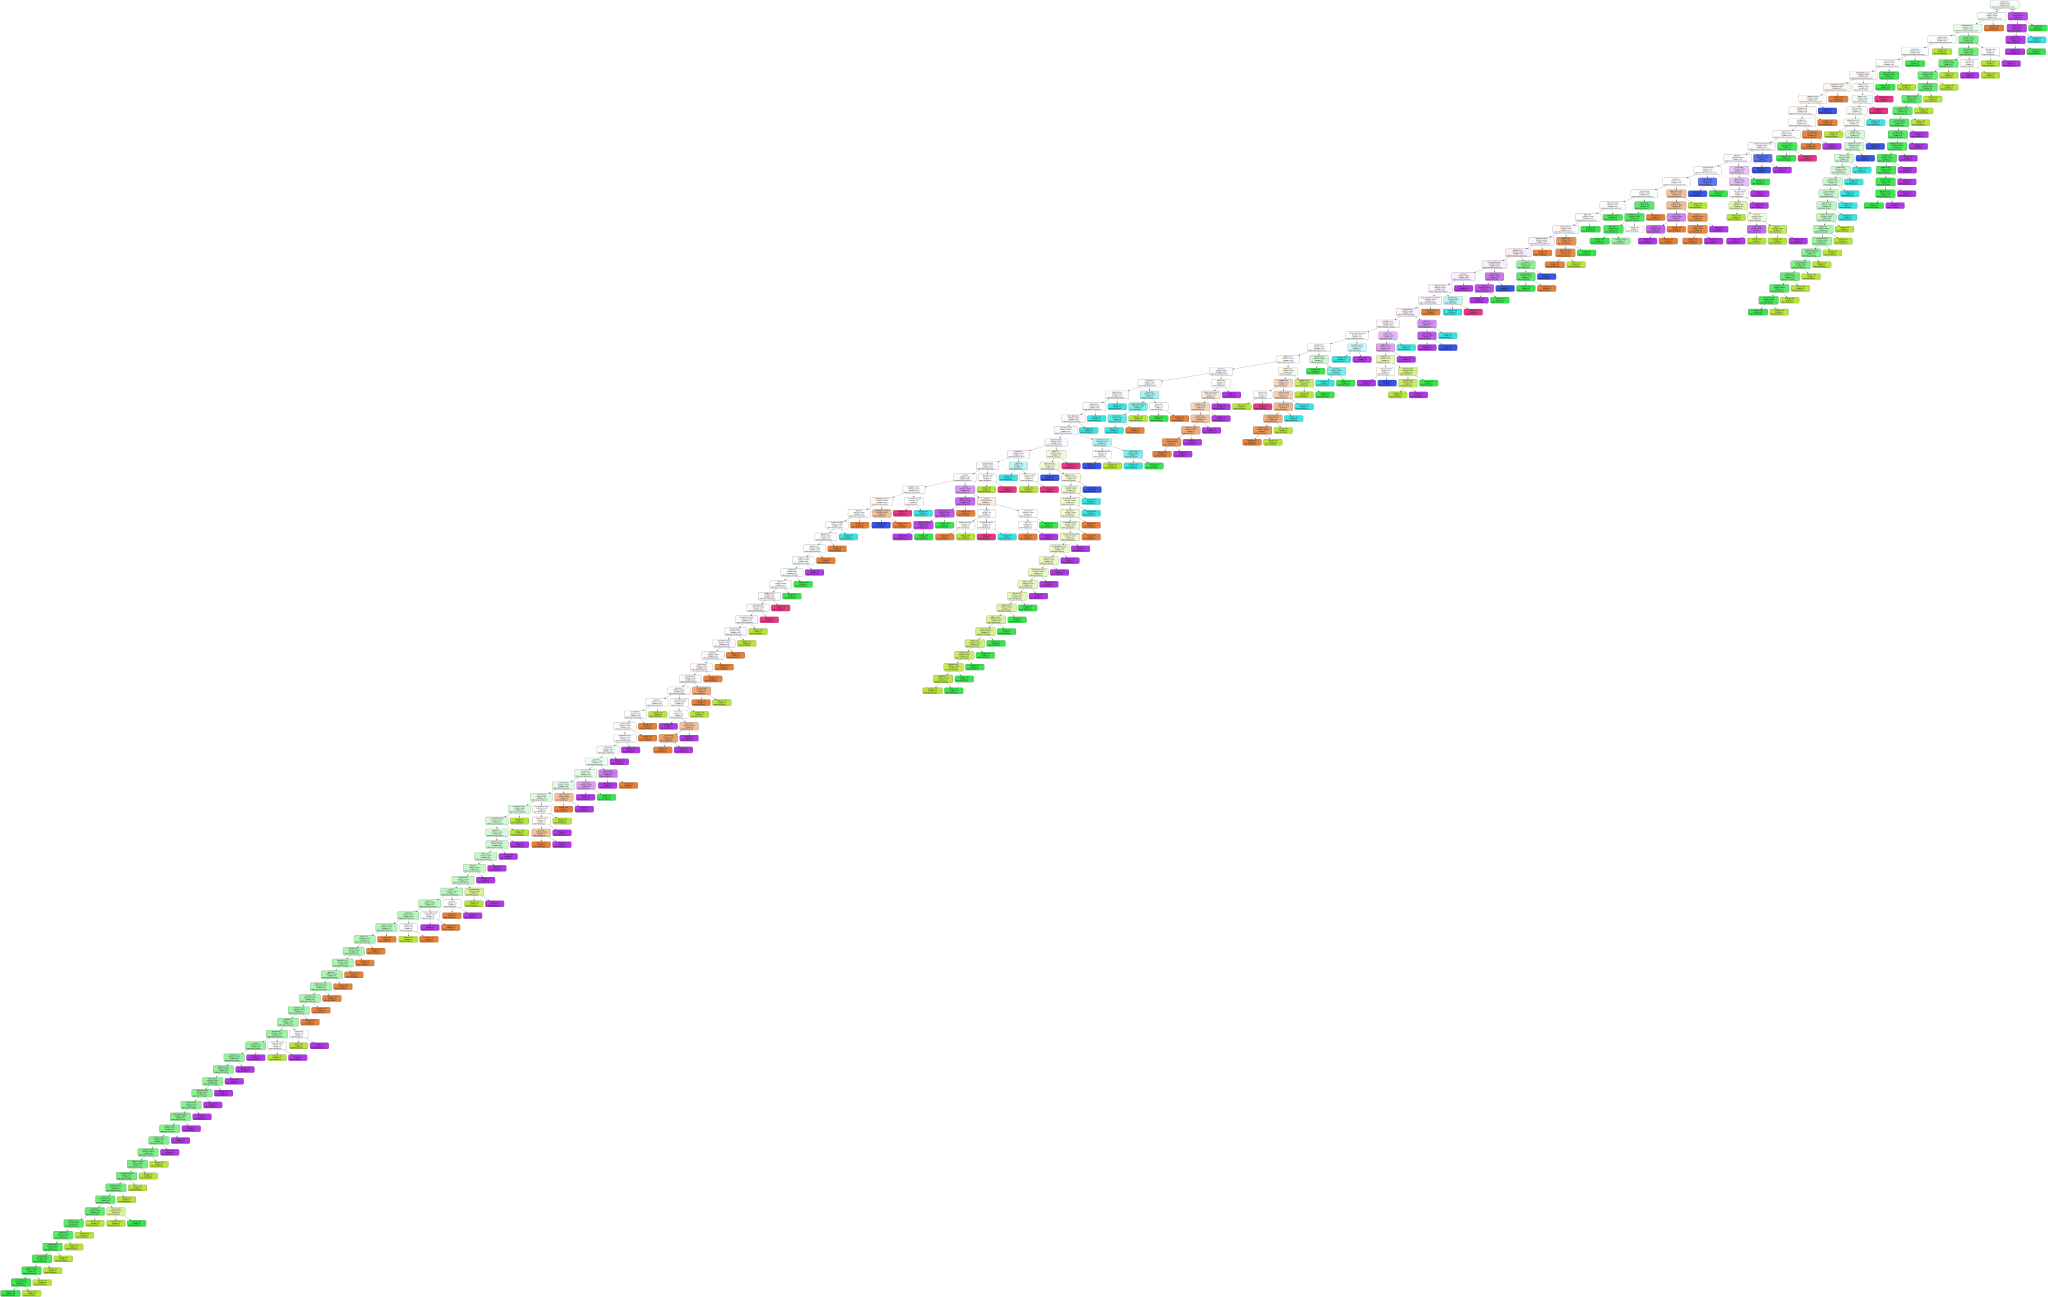

In [83]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=palabrasUnicasVector,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

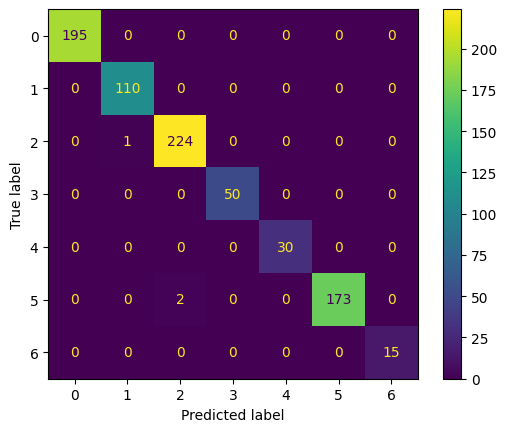

In [84]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
y_predict = clf.predict(X_train)
cm = confusion_matrix(y_train, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              
                             )
disp.plot()


In [85]:
print(metrics.classification_report(y_train,y_predict, digits = 4))

                      precision    recall  f1-score   support

            Deportes     1.0000    1.0000    1.0000       195
           Educación     0.9910    1.0000    0.9955       110
     Entretenimiento     0.9912    0.9956    0.9933       225
       Gente y Blogs     1.0000    1.0000    1.0000        50
              Música     1.0000    1.0000    1.0000        30
Película y Animación     1.0000    0.9886    0.9943       175
               otros     1.0000    1.0000    1.0000        15

            accuracy                         0.9962       800
           macro avg     0.9974    0.9977    0.9976       800
        weighted avg     0.9963    0.9962    0.9962       800



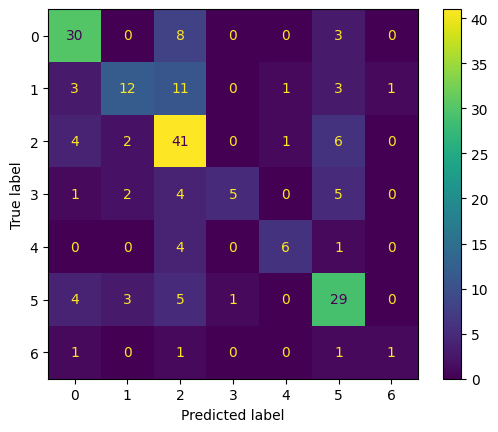

In [86]:
y_predict= clf.predict(X_test)
cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             )
disp.plot()

In [87]:
print(metrics.classification_report(y_test,y_predict, digits = 4))

                      precision    recall  f1-score   support

            Deportes     0.6977    0.7317    0.7143        41
           Educación     0.6316    0.3871    0.4800        31
     Entretenimiento     0.5541    0.7593    0.6406        54
       Gente y Blogs     0.8333    0.2941    0.4348        17
              Música     0.7500    0.5455    0.6316        11
Película y Animación     0.6042    0.6905    0.6444        42
               otros     0.5000    0.2500    0.3333         4

            accuracy                         0.6200       200
           macro avg     0.6530    0.5226    0.5542       200
        weighted avg     0.6395    0.6200    0.6075       200



## Usando Random forest

In [88]:
rf = RandomForestClassifier(n_estimators=3)
rf.fit(X, y)

RandomForestClassifier(n_estimators=3)

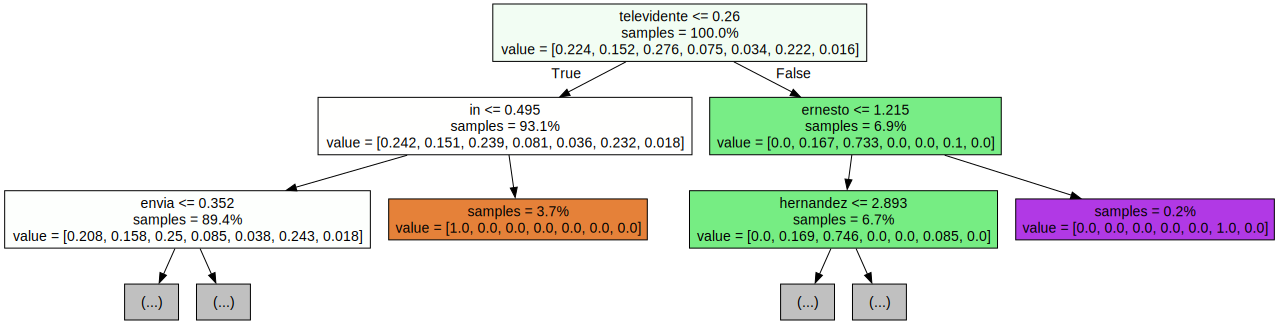

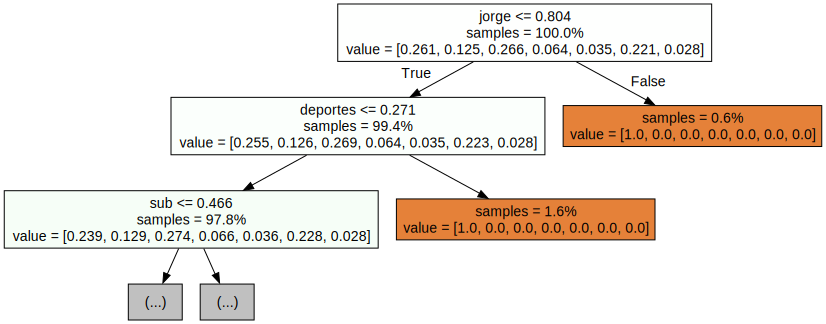

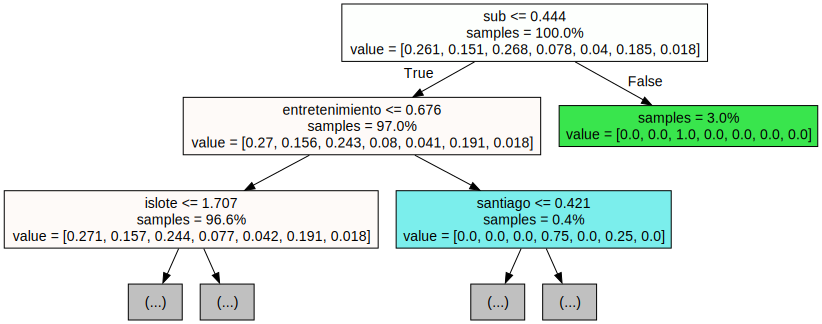

In [89]:

from sklearn.tree import export_graphviz



for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

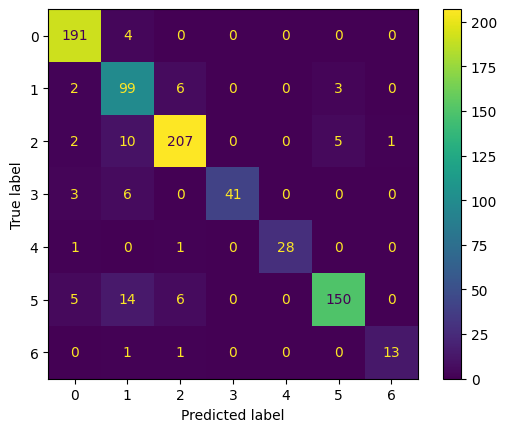

In [90]:
y_predict=rf.predict(X_train)
cm = confusion_matrix(y_train, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             )
disp.plot()

In [91]:
print(metrics.classification_report(y_train,y_predict, digits = 4))

                      precision    recall  f1-score   support

            Deportes     0.9363    0.9795    0.9574       195
           Educación     0.7388    0.9000    0.8115       110
     Entretenimiento     0.9367    0.9200    0.9283       225
       Gente y Blogs     1.0000    0.8200    0.9011        50
              Música     1.0000    0.9333    0.9655        30
Película y Animación     0.9494    0.8571    0.9009       175
               otros     0.9286    0.8667    0.8966        15

            accuracy                         0.9113       800
           macro avg     0.9271    0.8967    0.9087       800
        weighted avg     0.9183    0.9113    0.9124       800



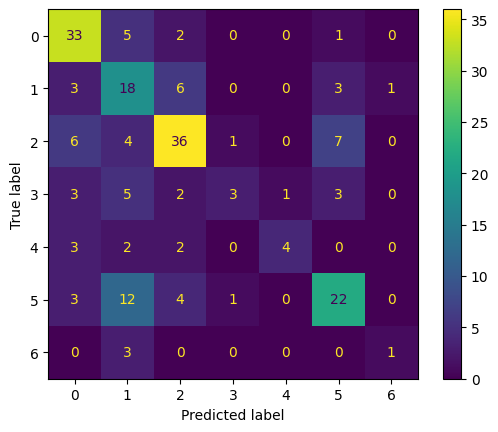

In [92]:
y_predict = rf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             )
disp.plot()

In [93]:
print(metrics.classification_report(y_test,y_predict, digits = 4))

                      precision    recall  f1-score   support

            Deportes     0.6471    0.8049    0.7174        41
           Educación     0.3673    0.5806    0.4500        31
     Entretenimiento     0.6923    0.6667    0.6792        54
       Gente y Blogs     0.6000    0.1765    0.2727        17
              Música     0.8000    0.3636    0.5000        11
Película y Animación     0.6111    0.5238    0.5641        42
               otros     0.5000    0.2500    0.3333         4

            accuracy                         0.5850       200
           macro avg     0.6025    0.4809    0.5024       200
        weighted avg     0.6098    0.5850    0.5760       200



## Usando GBM

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=3,
                                 learning_rate=1.0,max_depth=3, random_state=0)
gbm.fit(X, y)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=3, random_state=0)

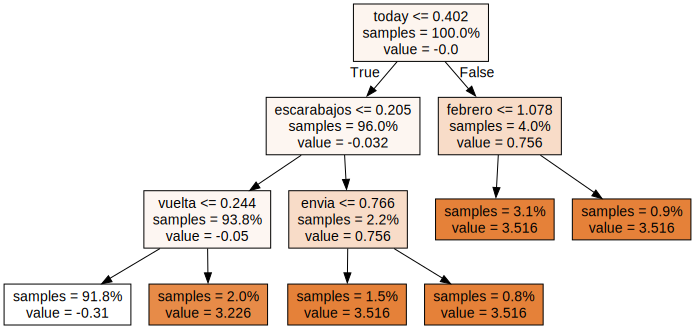

In [95]:
tree = gbm.estimators_[0][0]
dot_data = export_graphviz(tree,
                           feature_names=palabrasUnicasVector,  
                           filled=True,  
                           max_depth=3, 
                           impurity=False, 
                           proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

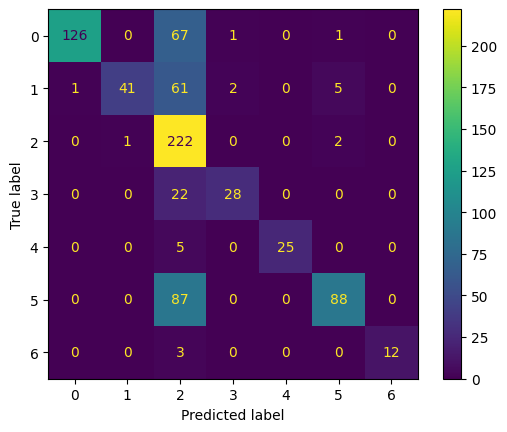

In [96]:
y_predict= gbm.predict(X_train)
cm = confusion_matrix(y_train, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             )
disp.plot()

In [97]:
print(metrics.classification_report(y_train,y_predict, digits = 4))

                      precision    recall  f1-score   support

            Deportes     0.9921    0.6462    0.7826       195
           Educación     0.9762    0.3727    0.5395       110
     Entretenimiento     0.4754    0.9867    0.6416       225
       Gente y Blogs     0.9032    0.5600    0.6914        50
              Música     1.0000    0.8333    0.9091        30
Película y Animación     0.9167    0.5029    0.6494       175
               otros     1.0000    0.8000    0.8889        15

            accuracy                         0.6775       800
           macro avg     0.8948    0.6717    0.7289       800
        weighted avg     0.8230    0.6775    0.6814       800



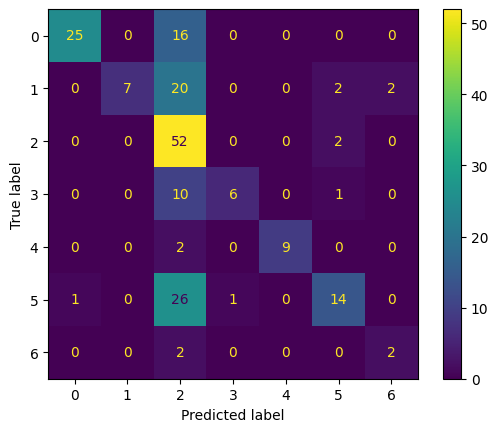

In [98]:
y_predict=gbm.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             )
disp.plot()

In [99]:
print(metrics.classification_report(y_test,y_predict, digits = 4))

                      precision    recall  f1-score   support

            Deportes     0.9615    0.6098    0.7463        41
           Educación     1.0000    0.2258    0.3684        31
     Entretenimiento     0.4062    0.9630    0.5714        54
       Gente y Blogs     0.8571    0.3529    0.5000        17
              Música     1.0000    0.8182    0.9000        11
Película y Animación     0.7368    0.3333    0.4590        42
               otros     0.5000    0.5000    0.5000         4

            accuracy                         0.5750       200
           macro avg     0.7803    0.5433    0.5779       200
        weighted avg     0.7544    0.5750    0.5628       200



## Regresion logistica

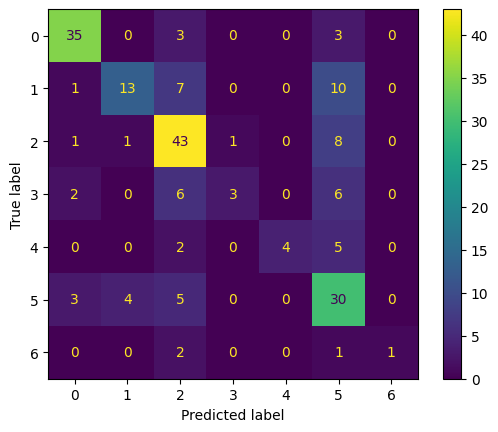

In [100]:
import statsmodels.api as sm
clf1 = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
clf1.coef_
cm = confusion_matrix(y_test, clf1.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              )
disp.plot()

In [101]:
y_predict=clf1.predict(X_test)
print(metrics.classification_report(y_test,y_predict, digits = 4))

                      precision    recall  f1-score   support

            Deportes     0.8333    0.8537    0.8434        41
           Educación     0.7222    0.4194    0.5306        31
     Entretenimiento     0.6324    0.7963    0.7049        54
       Gente y Blogs     0.7500    0.1765    0.2857        17
              Música     1.0000    0.3636    0.5333        11
Película y Animación     0.4762    0.7143    0.5714        42
               otros     1.0000    0.2500    0.4000         4

            accuracy                         0.6450       200
           macro avg     0.7734    0.5105    0.5528       200
        weighted avg     0.6923    0.6450    0.6271       200



## ¿Cual es mejor?
mirando y analizando las metricas de precision, recall y acurazy, puedo decir  que el klearn es superior los demas, tanto en acurazy como en recall, tiene mejores aciertos
eñ gbm y el random forest dan una cantidad mayor de falsos positivos, mientras que skelearn tiene mayores aciertos, el de regresion logistia, tambien da buenos resultados, los 4 no son un buen modelo, pero debido a que solo tenemos 1000 titulos, no se puede realizar un modelo más exacto